# Исследование объявлений о продаже квартир

## Описание проекта

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

## Описание данных

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)

`balcony` — число балконов

`ceiling_height` — высота потолков (м)

`cityCenters_nearest` — расстояние до центра города (м)

`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

`first_day_exposition` — дата публикации

`floor` — этаж

`floors_total` — всего этажей в доме

`is_apartment` — апартаменты (булев тип)

`kitchen_area` — площадь кухни в квадратных метрах (м²)

`last_price` — цена на момент снятия с публикации

`living_area` — жилая площадь в квадратных метрах (м²)

`locality_name` — название населённого пункта

`open_plan` — свободная планировка (булев тип)

`parks_around3000` — число парков в радиусе 3 км

`parks_nearest` — расстояние до ближайшего парка (м)

`ponds_around3000` — число водоёмов в радиусе 3 км

`ponds_nearest` — расстояние до ближайшего водоёма (м)

`rooms` — число комнат

`studio` — квартира-студия (булев тип)

`total_area` — общая площадь квартиры в квадратных метрах (м²)

`total_images` — число фотографий квартиры в объявлении

## Цель исследования
Необходимо выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости Ленинградской области.

## Последовательность этапов анализа
1. Изучить общую информацию о датасете.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных.
4. Сделать выводы

## 1. Общая информация о данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', '{:.2f}'.format)
plt.style.use('dark_background')

In [2]:
try:
    df = pd.read_csv(r'D:\Учеба\Data Scientist\Проекты\EDA\real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


По первым пяти строкам видно, что в датафрейме есть столбцы с пропущенными значениями. Необходимо посмотреть более подробную информацию

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Столбец с датой имеет тип object. Видим несколько столбцов с большим количеством пропущенных значений, например, `is_apartment`, `parks_nearest` и `ponds_nearest`. Посмотрим процент пропущенных данных по столбцам

In [5]:
df.isnull().mean() * 100

total_images            0.00
last_price              0.00
total_area              0.00
first_day_exposition    0.00
rooms                   0.00
ceiling_height         38.80
floors_total            0.36
living_area             8.03
floor                   0.00
is_apartment           88.29
studio                  0.00
open_plan               0.00
kitchen_area            9.61
balcony                48.61
locality_name           0.21
airports_nearest       23.38
cityCenters_nearest    23.29
parks_around3000       23.28
parks_nearest          65.91
ponds_around3000       23.28
ponds_nearest          61.56
days_exposition        13.42
dtype: float64

9 из 22 двух столбцов датафрейма имеют больше 20% пропущенных значений. В колонке `is_apartment` пропущены почти все значения. Если явно не указано, что квартира является апартаментами, то, скорее всего, она ими не является. Пропущенные значения можно заполнить значением 'False'. То же самое с количеством балконов в квартире: если их количество не указано, скорее всего, их нет. При этом 4 параметра (`aairports_nearest`, `cityCenters_nearest`, `parks_around3000`, `ponds_around3000`) имеют схожие значения процента пропусков, возможно пропуски в этих столбцах связаны между собой. Посмотрим несколько строк с пропусками из этих колонок

In [6]:
df[df['parks_around3000'].isnull()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
8,20,2900000.00,33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
12,10,3890000.00,54.00,2016-06-30T00:00:00,2,NaN,5.00,30.00,5,NaN,...,9.00,0.00,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.00
22,20,5000000.00,58.00,2017-04-24T00:00:00,2,2.75,25.00,30.00,15,NaN,...,11.00,2.00,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.00
30,12,2200000.00,32.80,2018-02-19T00:00:00,1,NaN,9.00,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.00
37,10,1990000.00,45.80,2017-10-28T00:00:00,2,2.50,5.00,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.00
38,10,3150000.00,40.00,2018-03-29T00:00:00,1,2.75,18.00,16.30,9,NaN,...,11.60,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,103.00
47,17,3600000.00,56.10,2018-10-18T00:00:00,3,NaN,4.00,42.50,3,NaN,...,5.70,1.00,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,179.00
60,3,2740000.00,35.00,2018-01-01T00:00:00,1,NaN,12.00,NaN,8,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.00
62,0,4800000.00,78.60,2017-09-17T00:00:00,3,2.80,9.00,48.80,5,NaN,...,11.90,2.00,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.00


Похоже, что пропуски в этих колонках связаны с расположением квартир не в городе, либо со сбоями при внесении картографических данных. Эти колонки трогать не будем. Посмотрим метрики данных по столбцам

In [7]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,23699.00,23699.00,23699.00,14504.00,23613.00,21796.00,23699.00,21421.00,12180.00,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
mean,9.86,6541548.77,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,10887013.27,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4650000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6800000.00,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


Максимальные значения в столбцах с высотой потолков, количеством этажей, площадью кухни вызывают вопросы. Еще интересны позиции с высотой потолков 1 м. Нужно посмотреть распределения данных по столбцам

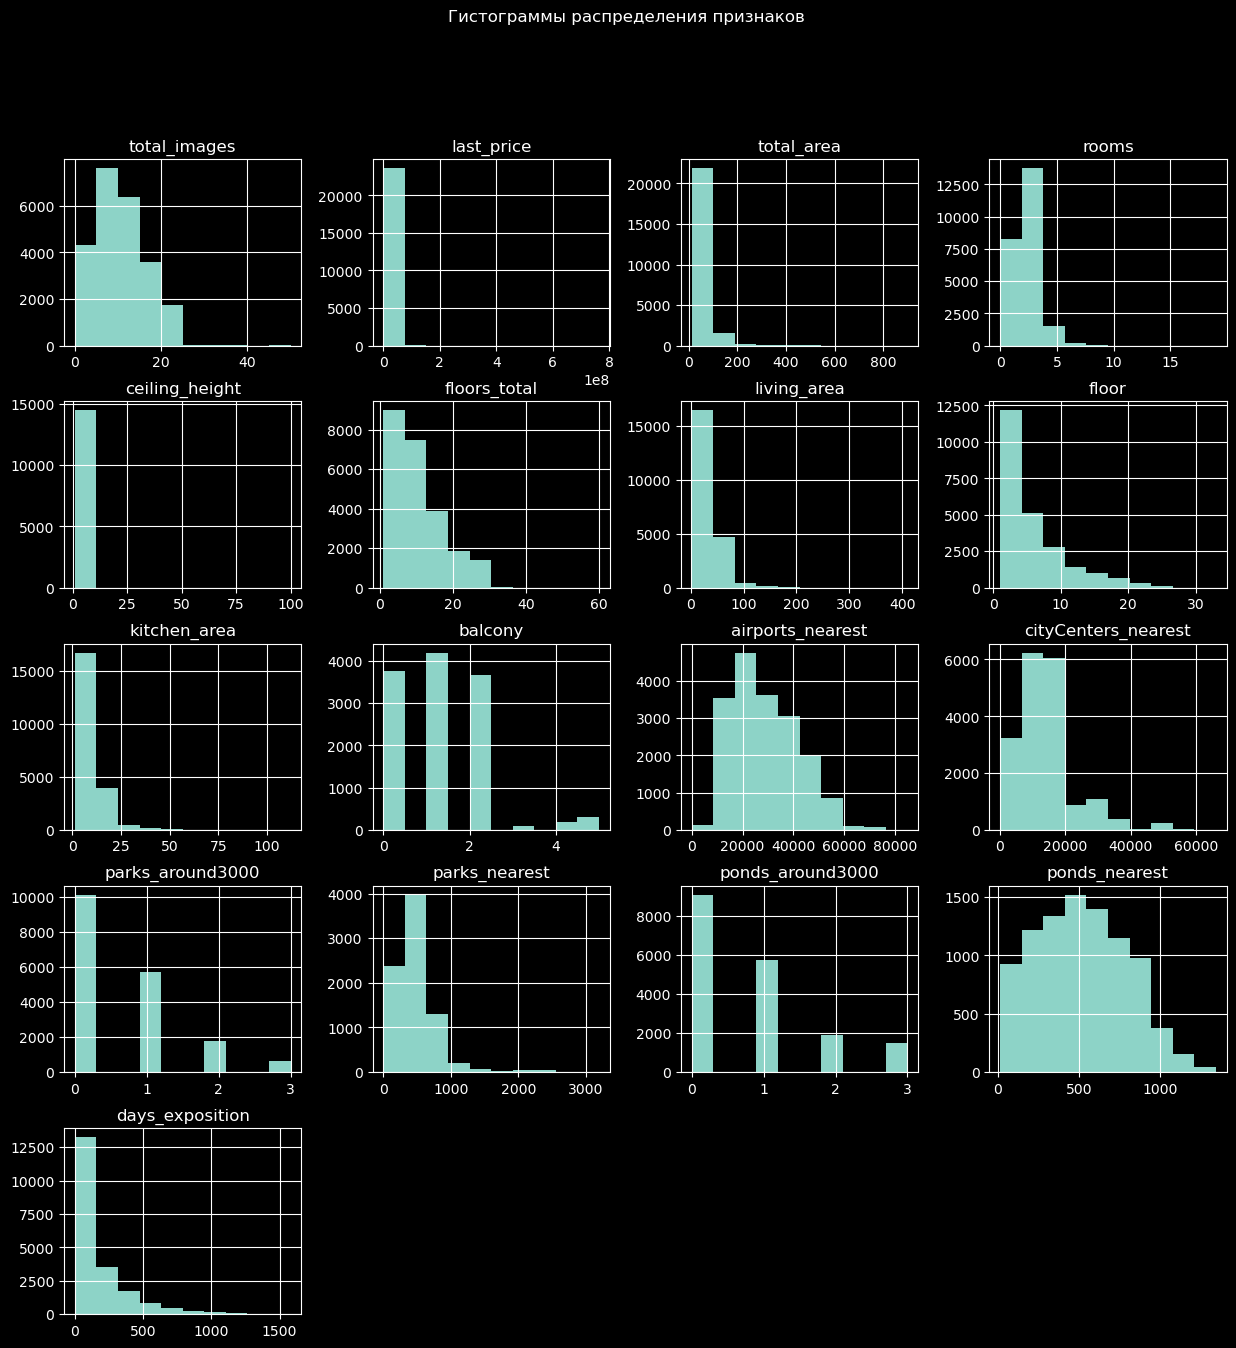

In [8]:
df.hist(figsize=(15, 15))
plt.suptitle('Гистограммы распределения признаков');

Почти все распределения скошены вправо, на что влияют сильно выбивающиеся значения.

### Вывод
Учитывая рассмотренные выше проблемы можно заключить, что необходимо преобразование типов данных в столбцах `floors_total`, `balcony`, `parks_around3000`, `parks_around3000`, `days_exposition` и `first_day_exposition`. Есть проблема с пропусками данных и экстремальными значениями, которые могут повлиять на дальнейший анализ. Пропуски в столбцах `is_apartment` и `balcony` можно заполнить значениями "False" и 0 соответственно. Нужно проанализировать другие столбцы на возможность заполнения пропусков. Экстемальные значения, вероятно, лучше исключить из анализа, чтобы они не влияли на результат.

## 2. Предобработка данных

### 2.1. Обработка пропусков данных

Заменим отсутствующие значения в столбце `is_apartment` на False

In [9]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].isnull().sum()

0

Заменим отсутствующие значения в столбце `balcony` на 0

In [10]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].isnull().sum()

0

Заменим отсутствующие значения в столбце `ceiling_height` на медианное

In [11]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df['ceiling_height'].isnull().sum()

0

В датафрейме присутствуют пропуски в столбце с жилой площадью. Жилая площадь, вероятно, коррелирует с количеством комнат. Проверим это

In [12]:
df['rooms'].corr(df['living_area'])

0.8459774567888595

Получили достаточно высокое значение корреляции, поэтому можно заменить пропуски медианным значением площади по количеству комнат

In [13]:
df['living_area'] = df['living_area'].fillna(df.groupby('rooms')['living_area'].transform('median'))
df['living_area'].isnull().sum()

0

Помимо жилой площади, есть пропуски в столбце с площадью кухни. Для квартир-студий и квартир с открытой планировкой площадь кухни можно установить 0, т.к. она формально не выделяется. Остальные строки с пропусками придется удалить из датасета

In [14]:
df['kitchen_area'].isnull().sum()

2278

In [15]:
df.loc[(((df['studio'] == True) | (df['open_plan'] == True)) & (df['kitchen_area'].isnull())), 'kitchen_area'] = 0
df['kitchen_area'].isnull().sum()

2062

In [16]:
df.dropna(subset=['kitchen_area'], inplace=True)
df['kitchen_area'].isnull().sum()

0

Также есть небольшие доли пропусков в месте расположения и этажности строения. От них тоже избавимся

In [17]:
df.dropna(subset=['locality_name'], inplace=True)
df['locality_name'].isnull().sum()

0

In [18]:
df.dropna(subset=['floors_total'], inplace=True)
df['floors_total'].isnull().sum()

0

#### Вывод
В результате обработки удалось устранить пропуски в большей части колонок путем замены на наиболее вероятное значение. Часть пропусков данных пришлось удалить. Пропуски в географических данных и сроках размещения трогать не будем.

### 2.2. Изменение типов данных

Основное несоответствие в данных - тип object у столбца с датой. Сделаем преобразование

In [19]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%d %H:%M:%S')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07,3,2.70,16.00,51.00,8,False,...,25.00,0.00,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04,1,2.65,11.00,18.60,1,False,...,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20,2,2.65,5.00,34.30,4,False,...,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
4,2,10000000.00,100.00,2018-06-19,2,3.03,14.00,32.00,13,False,...,41.00,0.00,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
5,10,2890000.00,30.40,2018-09-10,1,2.65,12.00,14.40,5,False,...,9.10,0.00,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00


Еще можно исправить незначительные несоответствия в данных для колонок с ценой, количеством этажей и балконов

In [20]:
df[['floors_total', 'balcony', 'last_price']] = df[['floors_total', 'balcony', 'last_price']].astype(int)
df.dtypes

total_images                     int64
last_price                       int32
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int32
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int32
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

#### Вывод
Устранили важное несоответствие типа данных в колонке с датой. Также привели к целочисленному значению колонки с количественными данными без пропусков

### 2.3. Обработка дубликатов

Проверим датафрейм на наличие явных дублей

In [21]:
df.duplicated().sum()

0

Явных дублей в датасете нет. Могут быть скрытые дубли в наименовании локации. Выведем отсортированный список уникальных значений для этого столбца

In [22]:
locality_names = df['locality_name'].unique()
locality_names.sort()
locality_names

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Советский', 'городской посёлок Фёдоро

Получился достаточно большой список уникальных значений. На первый взгляд дубликаты могут появится из-за написания "е" и "ё". Проверим это

In [23]:
len(locality_names)

348

In [24]:
len(set([loc.replace('ё', 'е') for loc in locality_names]))

314

Видим наличие 34 дубликатов. Заменим в колонке датафрейма все "ё" на "е"

In [25]:
df['locality_name'] = df['locality_name'].str.replace("ё", "е")
len(df['locality_name'].unique())

314

Также могут быть дубликаты среди городских поселков и поселков городского типа. Заменим городские поселки на поселки городского типа

In [26]:
df['locality_name'] = df['locality_name'].str.replace("городской поселок", "поселок городского типа")
len(df['locality_name'].unique())

307

Еще заметны дубликаты в поселках при станциях. Заменим "поселок при железнодорожной станции" на "поселок станции"

In [27]:
df['locality_name'] = df['locality_name'].str.replace("поселок при железнодорожной станции", "поселок станции")
len(df['locality_name'].unique())

305

#### Вывод
Явных дубликатов в данных не обнаружено. Получилось обработать 43 скрытых дубликатов в колонке с названиями поселений.

### 2.4. Обработка аномальных значений

Как мы видели выше, распределения количественных значений по параметрам скошены вправо. Среди параметров нам больше всего интересны цена, площади, количество комнат и высота потолков. Посмотрим подробнее их распределения

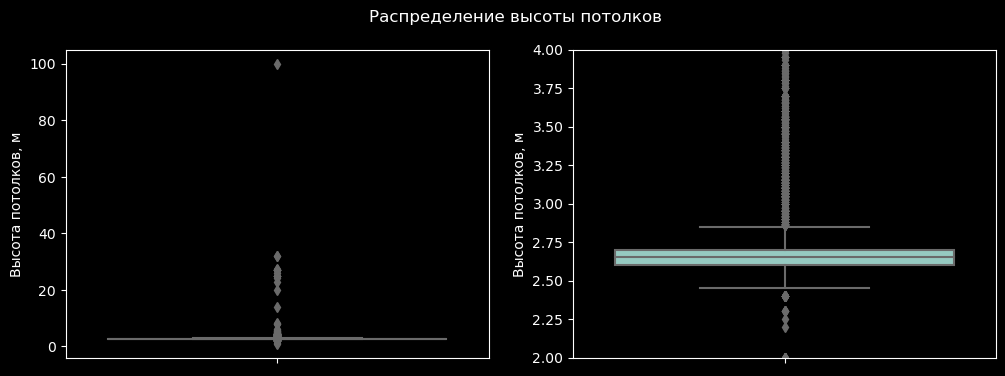

In [28]:
plt.figure(figsize=(12,4))
# Без ограничений по высоте
plt.subplot(1, 2, 1)
sns.boxplot(y="ceiling_height", data=df)
plt.ylabel('Высота потолков, м')
# Ограничение по высоте - 4 метра
plt.subplot(1, 2, 2)
sns.boxplot(y="ceiling_height", data=df)
plt.ylim(2,4)
plt.ylabel('Высота потолков, м')
plt.suptitle('Распределение высоты потолков')
plt.show()

Видим очень странный боксплот с сильно выбивающимся значением 100. Удалим строку с этим значением из датафрейма

In [29]:
df = df[df['ceiling_height'] < 40]

Значения выше 20 метров также выглядят неправдоподобно. Возможно возникла ошибка при занесении данных и значение увеличили на порядок. Разделим значения потолков выше 20 метров на 10

In [30]:
df['ceiling_height'] = df['ceiling_height'].apply(lambda x: (x / 10) if x > 20 else x)

Проверим что получилось

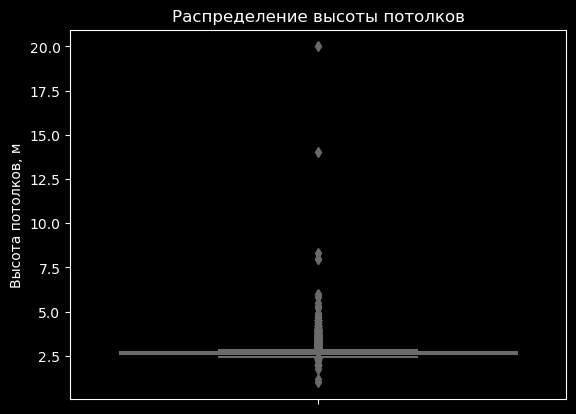

In [31]:
sns.boxplot(y="ceiling_height", data=df)
plt.ylabel('Высота потолков, м')
plt.title('Распределение высоты потолков')
plt.show()

Потолки высотой меньше 2 м вряд ли встречаются в квартирах. Как и очень высокие - выше 7 метров. Поэтому оставим строки со значениями высоты потолков от 2 до 7 м

In [32]:
df = df[(df['ceiling_height'] < 7) & (df['ceiling_height'] >= 2)]

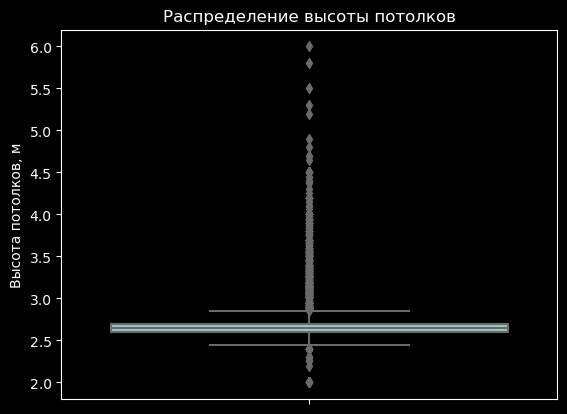

In [33]:
sns.boxplot(y="ceiling_height", data=df)
plt.ylabel('Высота потолков, м')
plt.title('Распределение высоты потолков')
plt.show()

Распределение стало более "нормальным", но остается много значений за пределами "усов". Их придется оставить. Перейдем к общей площади объектов

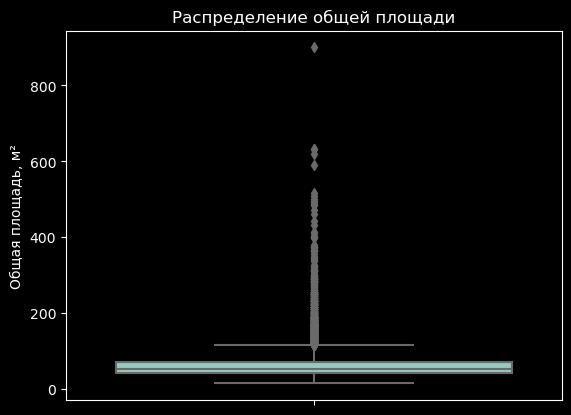

In [34]:
sns.boxplot(y="total_area", data=df)
plt.ylabel('Общая площадь, м²')
plt.title('Распределение общей площади')
plt.show()

Видно много потенциальных выбросов. Можно ограничить площадь квартиры 200 м², чтобы нормализовать распределение и при этом не потерять много данных

In [35]:
df[df['total_area'] >= 200]['total_area'].count()

201

Оставив только строки со значениями площади менее 200 м², потеряем менее 1% данных

In [36]:
df = df[df['total_area'] < 200]

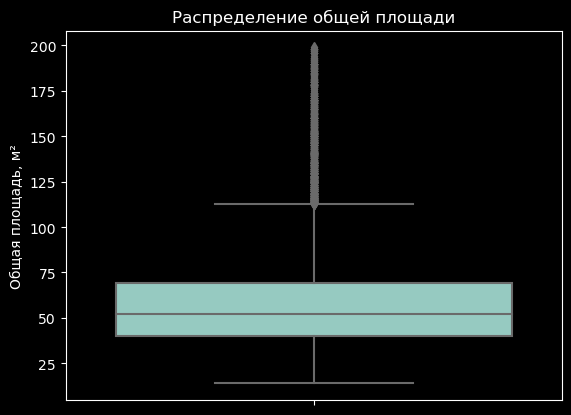

In [37]:
sns.boxplot(y="total_area", data=df)
plt.ylabel('Общая площадь, м²')
plt.title('Распределение общей площади')
plt.show()

Распределение стало более "нормальным"

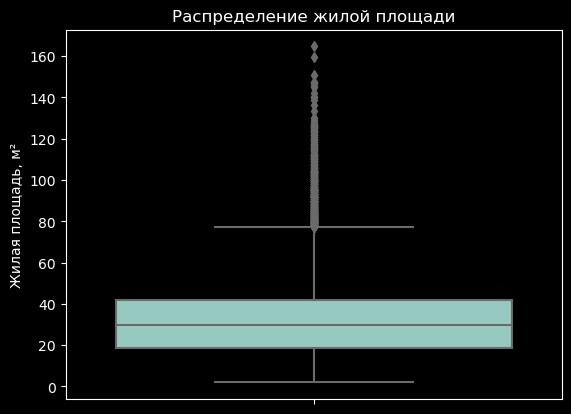

In [38]:
sns.boxplot(y="living_area", data=df)
plt.ylabel('Жилая площадь, м²')
plt.title('Распределение жилой площади')
plt.show()

После очистки колонки с общей площадью, распределение жилой площади также нормализовалось.

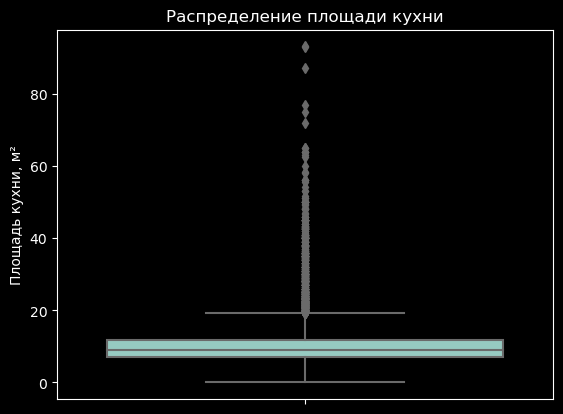

In [39]:
sns.boxplot(y="kitchen_area", data=df)
plt.ylabel('Площадь кухни, м²')
plt.title('Распределение площади кухни')
plt.show()

Но на распределение площади кухни это так сильно не повлияло. Удалим строки со значениями более 40

In [40]:
df = df[df['kitchen_area'] <= 40]

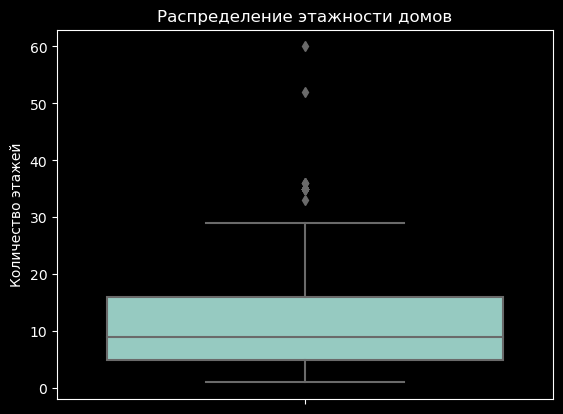

In [41]:
sns.boxplot(y="floors_total", data=df)
plt.ylabel('Количество этажей')
plt.title('Распределение этажности домов')
plt.show()

Жилые здания выше 40 этажей для Санкт-Петербурга выглядят неправдоподобно. Уберем 2 строки с самыми высокими зданиями

In [42]:
df = df[df['floors_total'] < 40]

Далее нужно избавиться от выбросов в ценах

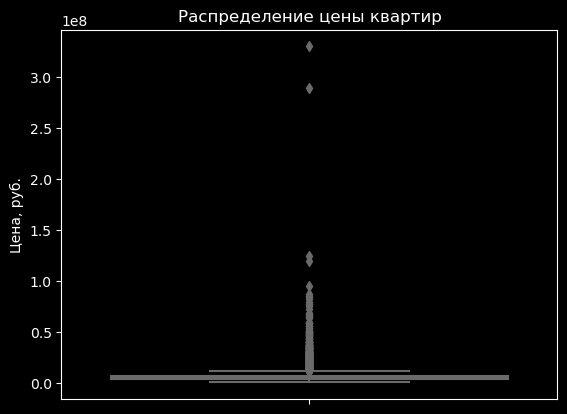

In [43]:
sns.boxplot(y="last_price", data=df)
plt.ylabel('Цена, руб.')
plt.title('Распределение цены квартир')
plt.show()

Избавимся от сильно выбивающихся значений более 150000000

In [44]:
df = df[df['last_price'] < 150000000]

In [45]:
df.shape[0]

21248

#### Вывод
В результате замены и удаления аномальных значений удалось немного выровнять распределения и не потерять много данных

### Вывод
В результате предобработки потеряли около 1% данных. Оставшихся данных достаточно для проведения анализа

## 3. Исследовательский анализ

### 3.1. Добавление вспомогательных колонок

Для проведения исследовательского анализа необходимо добавить несколько вспомогательных столбцов в датафрейм.
Для начала добавим стоимость 1 м².

In [46]:
df = df.assign(price_per_meter=lambda x: x['last_price'] / x['total_area'])
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,0,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN,120370.37
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,2,поселок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00,82920.79
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,0,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,92785.71
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,0,поселок городского типа Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00,95065.79
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,1,поселок Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00,99195.71


Далее нужен день недели, месяц и год публикации объявления о продаже

In [47]:
df = df.assign(publication_day=lambda x: x['first_day_exposition'].dt.dayofweek)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,publication_day
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN,120370.37,3
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,поселок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00,82920.79,1
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,92785.71,3
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,поселок городского типа Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00,95065.79,0
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,поселок Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00,99195.71,3


In [48]:
df = df.assign(publication_month=lambda x: x['first_day_exposition'].dt.month)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,publication_day,publication_month
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN,120370.37,3,3
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00,82920.79,1,12
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,92785.71,3,8
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,NaN,NaN,NaN,NaN,NaN,NaN,55.00,95065.79,0,9
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00,99195.71,3,11


In [49]:
df = df.assign(publication_year=lambda x: x['first_day_exposition'].dt.year)

Далее нужна колонка с типом этажа ("первый", "последний", "другой"). Для этого создадим функцию определяющцю тип этажа

In [50]:
def floor_typing(element):
    if element['floor'] == 1:
        return "первый"
    elif element['floor'] == element['floors_total']:
        return "последний"
    return "другой"

In [51]:
df['floor_type'] = df.apply(floor_typing, axis=1)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,publication_day,publication_month,publication_year,floor_type
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,1.00,482.00,2.00,755.00,NaN,120370.37,3,3,2019,другой
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,0.00,NaN,0.00,NaN,81.00,82920.79,1,12,2018,первый
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,1.00,90.00,2.00,574.00,558.00,92785.71,3,8,2015,другой
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,NaN,NaN,NaN,NaN,55.00,95065.79,0,9,2018,другой
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,0.00,NaN,0.00,NaN,155.00,99195.71,3,11,2017,другой


Еще добавим колонку с расстоянием до центра в км

In [52]:
df = df.assign(km_to_center=lambda x: round(x['cityCenters_nearest'] / 1000, 0))
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,publication_day,publication_month,publication_year,floor_type,km_to_center
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,482.00,2.00,755.00,NaN,120370.37,3,3,2019,другой,16.00
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,NaN,0.00,NaN,81.00,82920.79,1,12,2018,первый,19.00
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,90.00,2.00,574.00,558.00,92785.71,3,8,2015,другой,14.00
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,NaN,NaN,NaN,55.00,95065.79,0,9,2018,другой,NaN
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,NaN,0.00,NaN,155.00,99195.71,3,11,2017,другой,19.00


#### Вывод
В датафрейм добавлены вспомогательные колонки со стоимостью 1 м², днем недели, месяцем и годом публикации объявления, типом этажа и расстоянием до центра города в км.

### 3.2. Изучение параметров данных

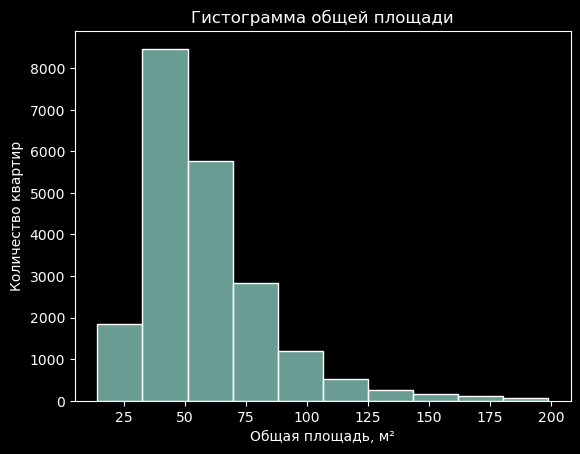

In [53]:
sns.histplot(data=df, x='total_area', bins=10)
plt.title('Гистограмма общей площади')
plt.xlabel('Общая площадь, м²')
plt.ylabel('Количество квартир')
plt.show()

Пик по общей площади продаваемых квартир находится в диапазоне 30-50 м²

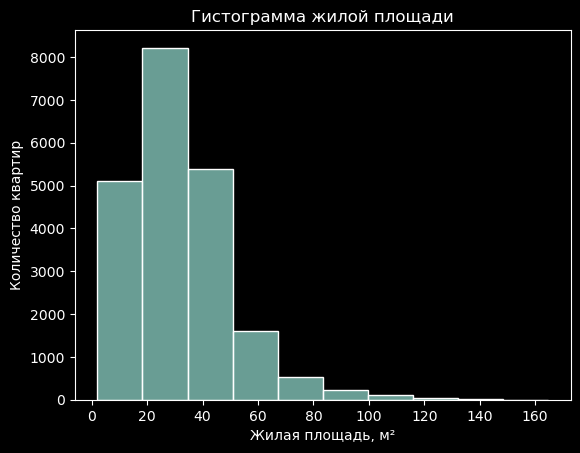

In [54]:
sns.histplot(data=df, x='living_area', bins=10)
plt.title('Гистограмма жилой площади')
plt.xlabel('Жилая площадь, м²')
plt.ylabel('Количество квартир')
plt.show()

Пик по жилой площади - 20-35 м²

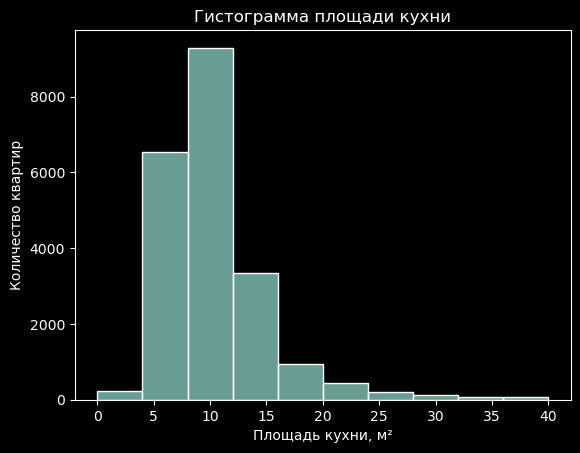

In [55]:
sns.histplot(data=df, x='kitchen_area', bins=10)
plt.title('Гистограмма площади кухни')
plt.xlabel('Площадь кухни, м²')
plt.ylabel('Количество квартир')
plt.show()

Кухни в большинстве имеют площадь 8-12  м².

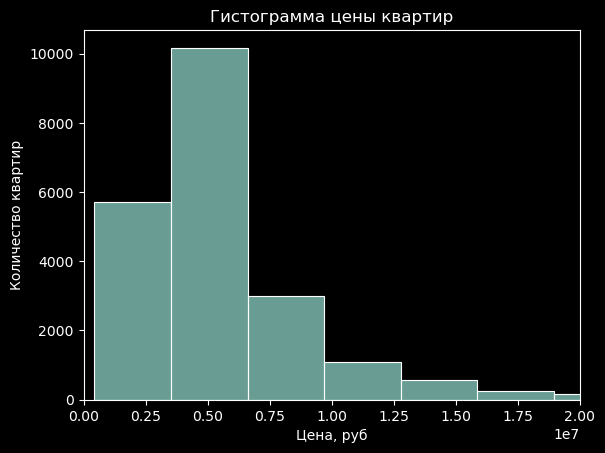

In [56]:
sns.histplot(data=df, x='last_price', bins=40)
plt.xlim((0, 20000000))
plt.title('Гистограмма цены квартир')
plt.xlabel('Цена, руб')
plt.ylabel('Количество квартир')
plt.show()

Большая часть квартир имеет ценовой диапазон от 3 до 7 млн.

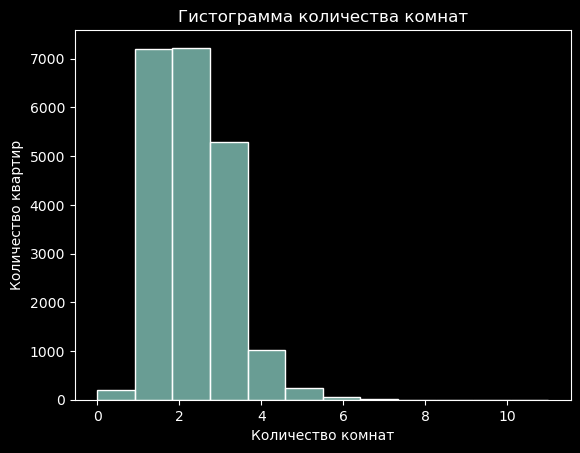

In [57]:
sns.histplot(data=df, x='rooms', bins=12)
plt.title('Гистограмма количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

В большинстве предложения 1 и 2-х комнатных квартир.

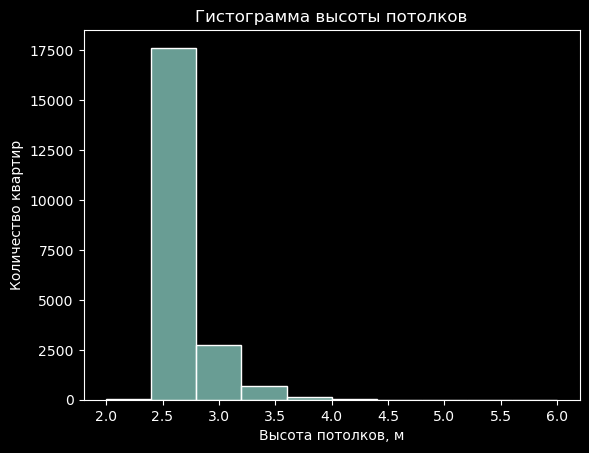

In [58]:
sns.histplot(data=df, x='ceiling_height', bins=10)
plt.title('Гистограмма высоты потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество квартир')
plt.show()

Пик, как и ожидалось, в диапазоне стандартной высоты потолков

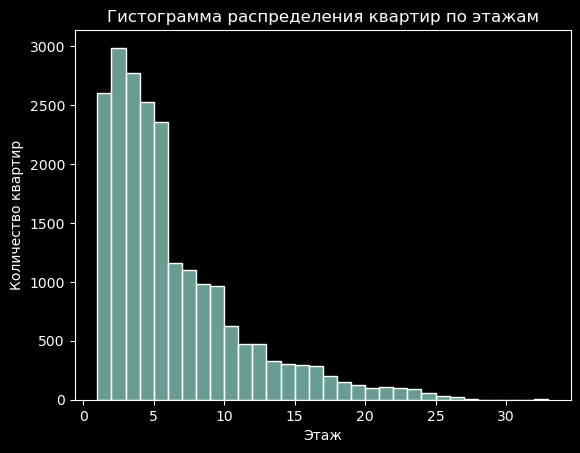

In [59]:
sns.histplot(data=df, x='floor', bins=32)
plt.title('Гистограмма распределения квартир по этажам')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

Больше квартир находятся на этажах с 1 по 5

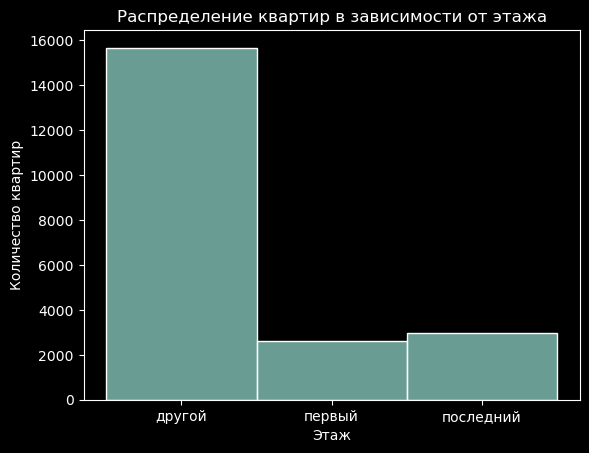

In [60]:
sns.histplot(data=df, x='floor_type')
plt.title('Распределение квартир в зависимости от этажа')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

А по типу этажа преобладают квартиры между первым и последним

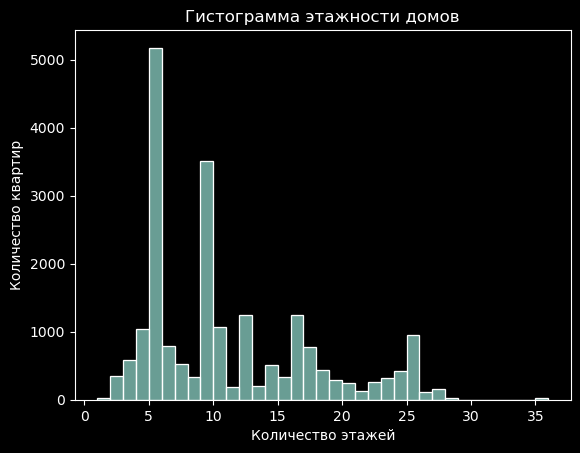

In [61]:
sns.histplot(data=df, x='floors_total', bins=35)
plt.title('Гистограмма этажности домов')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
plt.show()

Среди объявлений больше всего предлагают квартиры в пятиэтажных домах. На втором месте девятиэтажные дома.

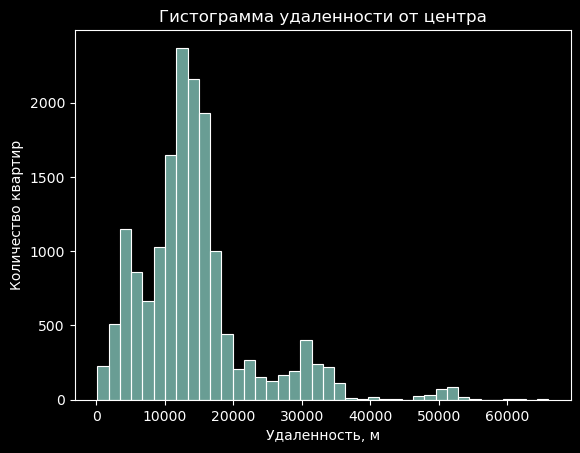

In [62]:
sns.histplot(data=df, x='cityCenters_nearest', bins=40)
plt.title('Гистограмма удаленности от центра')
plt.xlabel('Удаленность, м')
plt.ylabel('Количество квартир')
plt.show()

Большинство квартир находятся в 12-18 км от центра города.

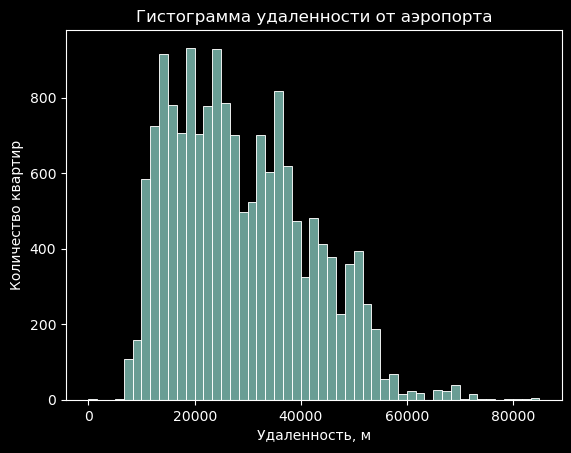

In [63]:
sns.histplot(data=df, x='airports_nearest', bins=51)
plt.title('Гистограмма удаленности от аэропорта')
plt.xlabel('Удаленность, м')
plt.ylabel('Количество квартир')
plt.show()

Большинство квартир находятся в 15-30 км от аэропорта.

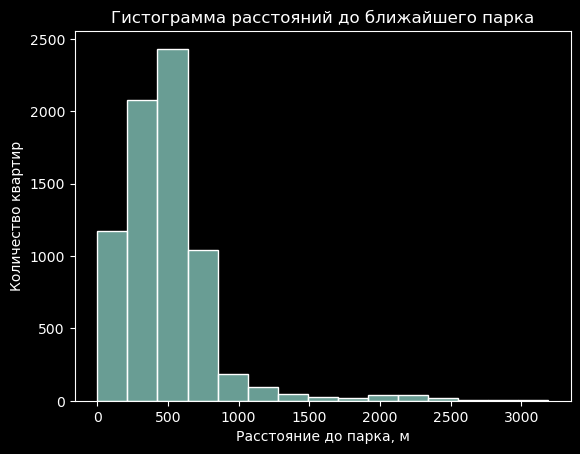

In [64]:
sns.histplot(data=df, x='parks_nearest', bins=15)
plt.title('Гистограмма расстояний до ближайшего парка')
plt.xlabel('Расстояние до парка, м')
plt.ylabel('Количество квартир')
plt.show()

Почти все продаваемые квартиры имеют парк в пределах 1 км

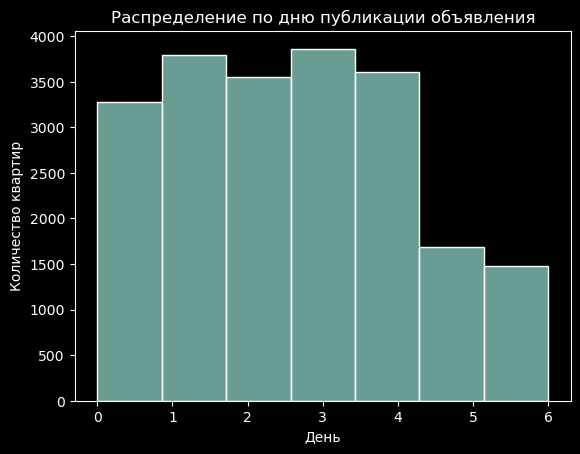

In [65]:
sns.histplot(data=df, x='publication_day', bins=7)
plt.title('Распределение по дню публикации объявления')
plt.xlabel('День')
plt.ylabel('Количество квартир')
plt.show()

Объявления публикуют по большей части в будние дни

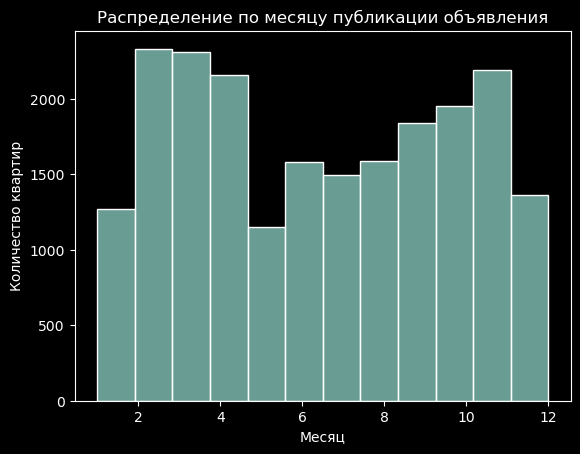

In [66]:
sns.histplot(data=df, x='publication_month', bins=12)
plt.title('Распределение по месяцу публикации объявления')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.show()

Количество объявлений возрастает в конце зимы-начале весны, далее идет спад и снова рост с середины лета до конца осени.

#### Вывод
По представленной информации можно заключить, что в среднем продают 1 или 2-х комнатную квартиру со стандартной высотой потолков и площадью 30-50 м² в пятиэтажном доме на промежуточном этаже за 5 млн руб. Дом находится в 12-18 км от центра и 15-30 км от аэропорта. В пределах 1 км от дома есть парк.

### 3.3. Скорость продажи квартир
Далее посмотрим как быстро продавались квартиры

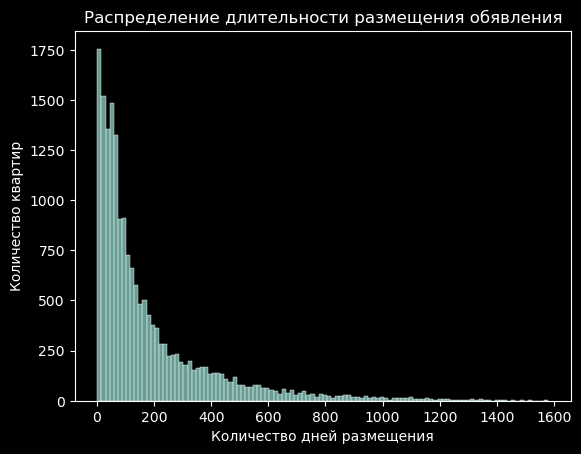

In [67]:
sns.histplot(data=df, x='days_exposition')
plt.title('Распределение длительности размещения обявления')
plt.xlabel('Количество дней размещения')
plt.ylabel('Количество квартир')
plt.show()

In [68]:
df['days_exposition'].describe()

count   18340.00
mean      183.20
std       220.20
min         1.00
25%        44.00
50%       100.00
75%       235.00
max      1580.00
Name: days_exposition, dtype: float64

#### Вывод
Гистограмма сильно скошена вправо. Это говорит о наличии небольшой доле значений с анамально большими значениями. Об этом же говорит разнмца между медианным значением 100 дней и средним 183 дня. Половина случаев находится в диапазоне 44-235 дней. Все значения ниже 44 можно считать быстрыми продажами. Все значения выше 235 дней - долгими. Самая долгое из объявлений висело 1580 дней (больше 4 лет).

### 3.4. Факторы, влияющие на стоимость квартир
Далее посмотрим что больше всего влияет на стоимость объекта

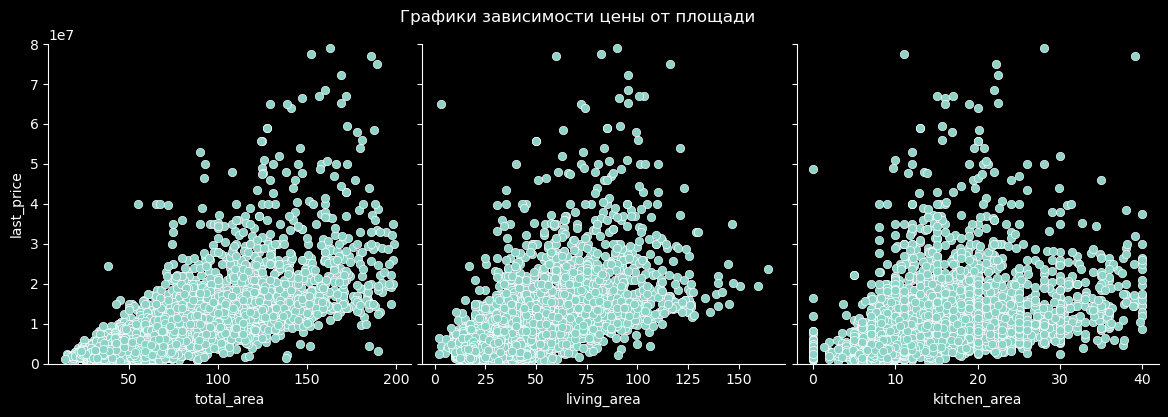

In [69]:
ax = sns.pairplot(data=df, x_vars=['total_area', 'living_area', 'kitchen_area'], y_vars='last_price', kind='scatter', height=4)
ax.set(ylim=(0, 80000000))
ax.fig.suptitle('Графики зависимости цены от площади', y=1.02)
plt.show()

In [70]:
print(f'''
Корреляция Пирсона между ценой и общей площадью: {df['last_price'].corr(df['total_area']):.2f}, 
Корреляция Пирсона между ценой и жилой площадью: {df['last_price'].corr(df['living_area']):.2f}, 
Корреляция Пирсона между ценой и площадью кухни: {df['last_price'].corr(df['kitchen_area']):.2f}
''')


Корреляция Пирсона между ценой и общей площадью: 0.72, 
Корреляция Пирсона между ценой и жилой площадью: 0.62, 
Корреляция Пирсона между ценой и площадью кухни: 0.52



На цену квартиры в большей степени оказывает влияние ее общая площадь.

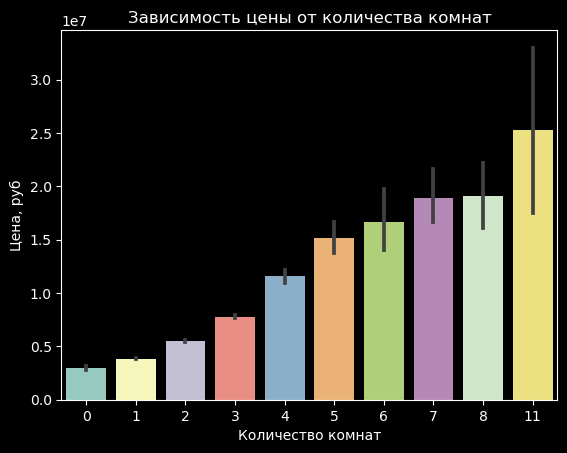

In [71]:
sns.barplot(data=df, x='rooms', y='last_price')
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена, руб')
plt.show()

Видим четкую зависимость между ценой и количеством комнат. При этом чем больше комнат, тем разброс значений выше. Это связано со снижением количества объявлений. В то же время количество комнат сильно коррелирует с общей и жилой площадью.

In [72]:
df.groupby('floor_type')['last_price'].agg(['count', 'mean', 'median'])

,count,mean,median
floor_type,,,
другой,15670,6183299.04,4800000.00
первый,2603,4588481.59,3900000.00
последний,2975,5731691.58,4290000.00


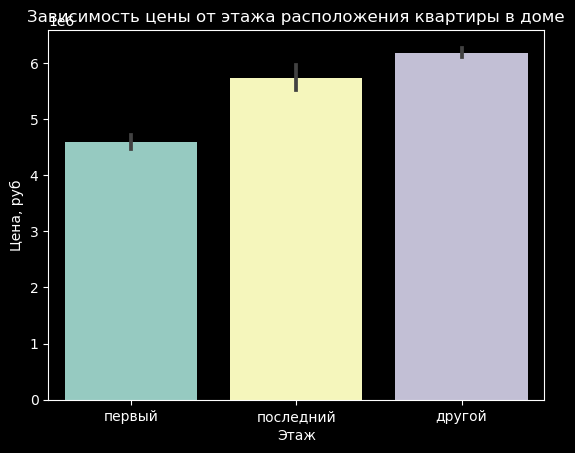

In [73]:
sns.barplot(data=df, x='floor_type', y='last_price', order=['первый', 'последний', 'другой'])
plt.title('Зависимость цены от этажа расположения квартиры в доме')
plt.xlabel('Этаж')
plt.ylabel('Цена, руб')
plt.show()

Видим, что цена также зависит от расположения объекта в здании. На первом этаже самые дешевые квартиры, далее идут квартиры на последнем этаже. Самые дорогие - между первым и последним

In [74]:
df.groupby('publication_day')['last_price'].agg(['count', 'mean', 'median'])

,count,mean,median
publication_day,,,
0,3276,6013920.20,4650000.00
1,3793,5938330.70,4730000.00
2,3555,5898167.15,4690000.00
3,3861,6171463.15,4650000.00
4,3602,5796909.63,4550000.00
5,1687,5676943.51,4500000.00
6,1474,5704701.08,4540000.00


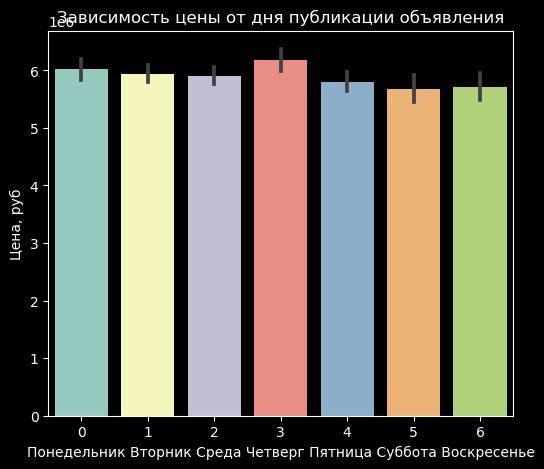

In [75]:
plt.figure(figsize=(6,5))
sns.barplot(data=df, x='publication_day', y='last_price')
plt.title('Зависимость цены от дня публикации объявления')
plt.xlabel('День публикации')
plt.ylabel('Цена, руб')
plt.xlabel('Понедельник Вторник Среда Четверг Пятница Суббота Воскресенье')
plt.show()

Заметно небольшое снижение стоимости к концу недели со скачком в четверг, если смотреть по среднему. В медианных значениях такой закономерности не наблюдается

In [76]:
df.groupby('publication_month')['last_price'].agg(['count', 'mean', 'median'])

,count,mean,median
publication_month,,,
1,1273,5889588.05,4600000.00
2,2333,6009183.25,4665000.00
3,2309,5799312.59,4650000.00
4,2159,5812094.05,4779014.00
5,1150,5908548.15,4500000.00
6,1583,5844051.77,4400000.00
7,1498,5923597.95,4600000.00
8,1591,6005298.91,4600000.00
9,1844,6040043.42,4690000.00


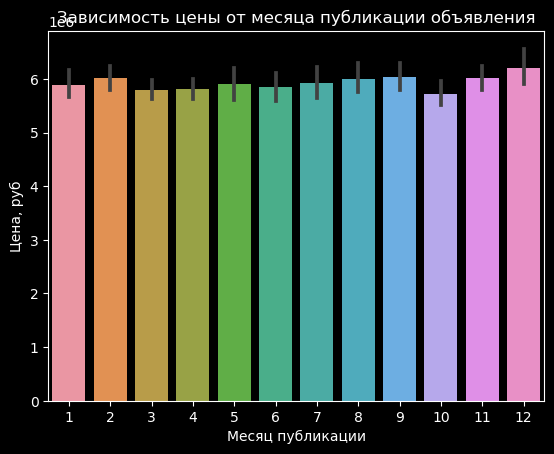

In [77]:
sns.barplot(data=df, x='publication_month', y='last_price')
plt.title('Зависимость цены от месяца публикации объявления')
plt.xlabel('Месяц публикации')
plt.ylabel('Цена, руб')
plt.show()

Четкой взаимосвязи между месяцем публикации и ценой не наблюдается

In [78]:
df.groupby('publication_year')['last_price'].agg(['count', 'mean', 'median'])

,count,mean,median
publication_year,,,
2014,123,10781769.27,7476560.00
2015,1039,6998989.13,5182000.00
2016,2523,6024843.60,4500000.00
2017,7456,5832546.06,4500000.00
2018,7455,5656946.65,4600000.00
2019,2652,6194987.75,5000000.00


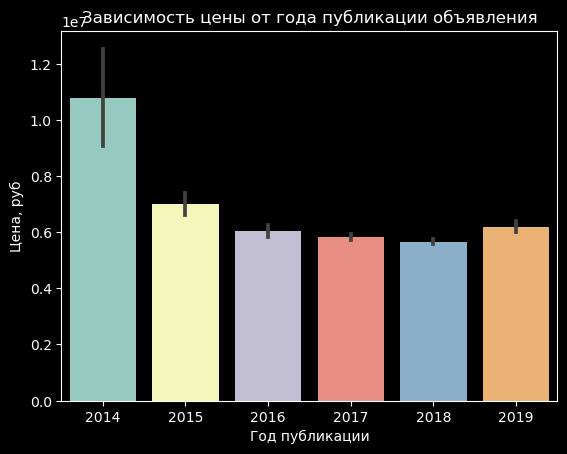

In [79]:
sns.barplot(data=df, x='publication_year', y='last_price')
plt.title('Зависимость цены от года публикации объявления')
plt.xlabel('Год публикации')
plt.ylabel('Цена, руб')
plt.show()

Самые дорогие квартиры за рассматриваемый период были в 2014 году. При этом заметен высокий разброс цен, так как там мало значений. Далее в 2015 год квартиры резко подешевели и шел тренд на снижение стоимости до 2018 года. В 2019 году цены на квартиры стали расти

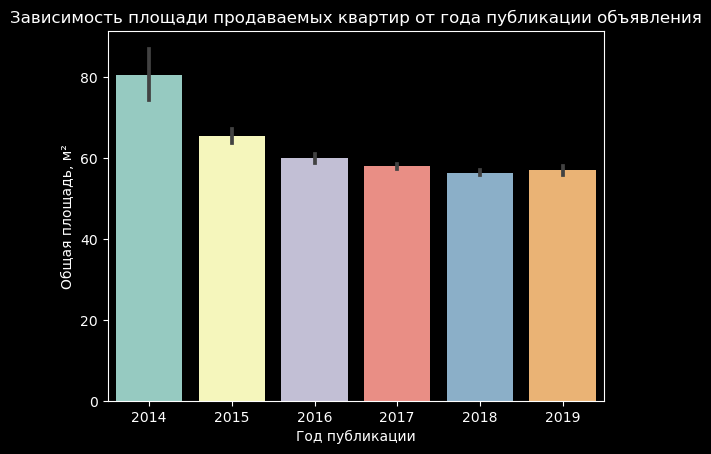

In [80]:
sns.barplot(data=df, x='publication_year', y='total_area')
plt.title('Зависимость площади продаваемых квартир от года публикации объявления')
plt.xlabel('Год публикации')
plt.ylabel('Общая площадь, м²')
plt.show()

Площадь продаваемых квартир с 2014 по 2018 заметно снизилась с 80 до менее 60 м².

#### Вывод
Таким образом, среди основных факторов, влияющих на стоимость квартиры можно выделить площадь квартиры, количество комнат, этаж расположения. Снижение стоимости квартир по годам связано со снижением площади продаваемых квартир.

### 3.5. Где больше всего объявлений
Теперь посмотрим топ-10 населенных пунктов по количеству объявлений и среднюю стоимость 1 м² в них

In [81]:
top10 = df.groupby('locality_name')['price_per_meter'].agg(['count', 'mean', 'median'])
top10 = top10.sort_values('count', ascending=False)[:10]
top10

,count,mean,median
locality_name,,,
Санкт-Петербург,14141,112344.48,104328.36
поселок Мурино,476,85939.84,86093.53
поселок Шушары,400,78740.21,77312.83
Всеволожск,363,69062.33,65833.33
Пушкин,329,103005.41,99987.18
Колпино,322,75106.55,74689.88
Гатчина,294,68692.93,67860.57
поселок Парголово,294,90590.90,92202.38
деревня Кудрово,250,92445.59,91930.23


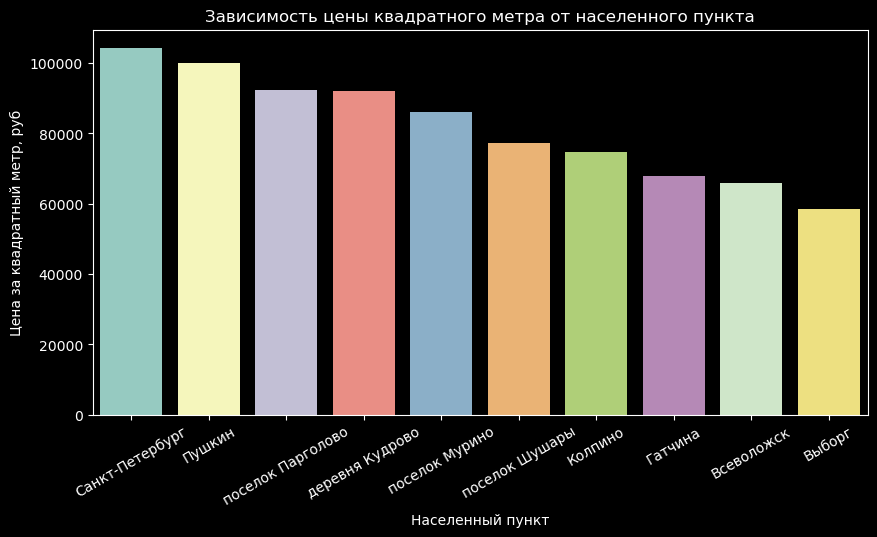

In [82]:
plt.figure(figsize=(10,5))
sns.barplot(data=top10.sort_values('median', ascending=False), y='median', x=top10.sort_values('median', ascending=False).index)
plt.xticks(rotation=30)
plt.title('Зависимость цены квадратного метра от населенного пункта')
plt.xlabel('Населенный пункт')
plt.ylabel('Цена за квадратный метр, руб')
plt.show()

#### Вывод
Среди топ-10 населенных пунктов по количеству объявлений самые дорогие квартиры находятся в Санкт-Петербурге, а самые дешевые - в Выборге

### 3.6. Сколько стоит километр к центру в Санкт-Петербурге

In [83]:
piter = df[df['locality_name'] == 'Санкт-Петербург']
# Поделим квартиры в Санкт-Петербурге на 10 примерно равных групп по расстоянию от центра города
piter_groups = piter.groupby(pd.qcut(piter['km_to_center'], q=10))['last_price'].agg(['count', 'mean', 'median'])
piter_groups

,count,mean,median
km_to_center,,,
"(-0.001, 5.0]",2137,11392999.86,9000000.00
"(5.0, 7.0]",872,12203498.46,7995000.00
"(7.0, 10.0]",1735,7303293.73,5700000.00
"(10.0, 11.0]",1085,6125904.62,5000000.00
"(11.0, 12.0]",1480,5824158.69,4990000.00
"(12.0, 13.0]",1347,5997329.97,5200000.00
"(13.0, 15.0]",2613,5624617.39,4890000.00
"(15.0, 16.0]",1159,5303603.08,4799500.00
"(16.0, 17.0]",790,5216596.73,4600000.00


Заметно снижение стоимости квартир при удалении от центра. Для расчета стоимости километра будем использовать медиану как более устойчивую метрику

In [84]:
# Для расчета стоимости 1 км возьмем разность медианных стоимостей первой и последней групп,
# а затем разделим на разность средних значений расстояний последней и первой групп
km_cost = (
    (piter_groups.iloc[0, -1] - piter_groups.iloc[-1, -1]) /               # разность медианных значений 
    (((piter_groups.index[-1].left + piter_groups.index[-1].right) / 2) -  # среднее расстояние в последней группе
     ((piter_groups.index[0].left + piter_groups.index[0].right) / 2))     # среднее расстояние в первой группе
)
km_cost

215116.70447062267

In [85]:
piter_groups_km = piter.groupby(pd.cut(piter['km_to_center'], bins=29))['last_price'].agg(['count', 'median'])
piter_groups_km.insert(0, 'km', range(1, 30))
piter_groups_km

,km,count,median
km_to_center,,,
"(-0.029, 1.0]",1,177,11100000.00
"(1.0, 2.0]",2,257,9700000.00
"(2.0, 3.0]",3,314,8300000.00
"(3.0, 4.0]",4,601,8900000.00
"(4.0, 5.0]",5,788,8922631.00
"(5.0, 6.0]",6,506,8437500.00
"(6.0, 7.0]",7,366,7353552.50
"(7.0, 8.0]",8,535,7400000.00
"(8.0, 9.0]",9,537,5400000.00


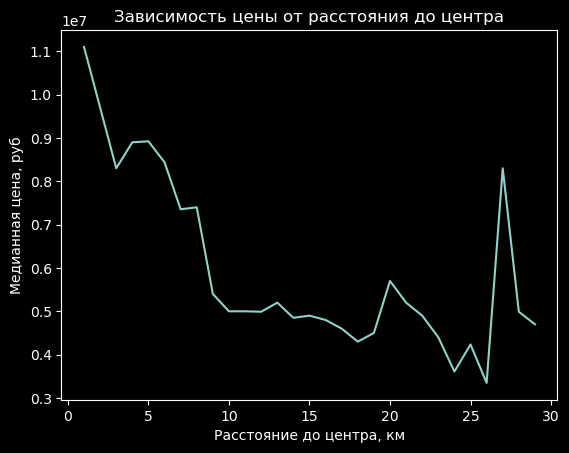

In [86]:
sns.lineplot(data=piter_groups_km, x='km', y='median')
plt.title('Зависимость цены от расстояния до центра')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Медианная цена, руб')
plt.show()

#### Вывод
Получилось, что каждый километр по направлению к центру города в Санкт-Петербурге увеличивает стоимость квартиры в среднем на 215 тыс. руб. По графику изменения цены в зависимости от расстояния до центра виден тренд на уменьшение стоимости при удалении от центра. Шум на графике вызван снижением количества предложений в группах по направлению к крайним значениям.

### Вывод
В результате исследовательского анализа удалось выяснить, что на стоимость квартир влияют площадь, количество комнат, этаж расположения, а также удаленность от центра города.
Из топ-10 городов с самым большим количеством объявлений самые дорогие квартиры находятся в Санкт-Петербурге, а самые дешевые - в Выборге.

## 4. Заключение

Исходный набор данных содержал большое количество пропусков (до 88% по колонке). В результате обрботки удалось устранить большую часть пропусков. 
Типы данных в колонках приведены в соответствие с содержимым.
Устранены 43 неявных дубликата в названиях населенных пунктов.
Аномальные значения в колонках устранены путем изменения на более вероятные, где это возможно. Остальные были удалены. Всего в результате предварительной обработки потеряно менее 2% данных.

Анализ сроков показа объявлений в сервисе показал, что в среднем продажа квартиры занимает от 44 до 235 дней. Максимальный срок размещения объявления составил 1580 дней.
Из факторов, оказывающих наибольшее влияние на стоимость квартиры, можно выделить общую, жилую и кухонную площадь, а также количество комнат. Расстояние до центра оказывает влияние, но в меньшей степени. День недели и месяц размещения не влияет на стоимость квартир. Выявлены колебания стоимости квартир по годам, что связано с уменьшением средней площади продаваемых квартир с 2014 по 2018 годы.
Среди топ-10 городов с самым большим количеством объявлений в Ленинградской области самая высокая стоимость квартир наблюдается в Санкт-Петербурге, а самая низкая - в Выборге.
Выявлено, что расстояние до центра города оказывает влияние на стоимость квартир в Санкт-Петербурге. В среднем 1 километр стоит около 215 тыс. руб.